In [50]:
# Importing Libraries


In [51]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns
from IPython.display import Markdown
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.express as px



In [52]:
# Importing Data

In [53]:
fatal = pd.read_excel("https://github.com/Data-Analytics-COVID-Hypothesis/Hypothesis-1/blob/master/Fatality.xlsx?raw=true",skiprows=2)
fatal = fatal.truncate(before=0, after=253)
fatal

,County Name,Fatalities 2020-04-12,Fatalities 2020-04-13,Fatalities 2020-04-14,Fatalities 2020-04-15,Fatalities 2020-04-16,Fatalities 2020-04-17,Fatalities 2020-04-18,Fatalities 2020-04-19,Fatalities 2020-04-20,...,Fatalities 2020-09-17,Fatalities 2020-09-18,Fatalities 2020-09-19,Fatalities 2020-09-20,Fatalities 2020-09-21,Fatalities 2020-09-22,Fatalities 2020-09-23,Fatalities 2020-09-24,Fatalities 2020-09-25,Fatalities 2020-09-26
0,ANDERSON,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0
1,ANDREWS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
2,ANGELINA,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,81.0,81.0,81.0,81.0,82.0,82.0,82.0,82.0,82.0,82.0
3,ARANSAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
4,ARCHER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,WOOD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,23.0,23.0,23.0,23.0,23.0,23.0
250,YOAKUM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
251,YOUNG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
252,ZAPATA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


In [54]:
hosp = pd.read_excel("https://github.com/Data-Analytics-COVID-Hypothesis/Hypothesis-1/blob/master/Hospital.xlsx?raw=true", sheet_name= 'COVID-19 Hospitalizations', skiprows=2)
hosp = hosp.truncate(before=0, after=21)
hosp

,TSA ID,TSA AREA,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,...,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26
0,A.,Amarillo,17.0,17.0,17.0,40.0,18.0,24.0,18.0,35.0,...,71.0,62.0,63.0,63.0,63.0,74.0,74.0,73.0,79.0,84.0
1,B.,Lubbock,34.0,35.0,31.0,34.0,32.0,38.0,35.0,32.0,...,75.0,74.0,90.0,92.0,102.0,98.0,91.0,100.0,108.0,107.0
2,C.,Wichita Falls,5.0,5.0,6.0,4.0,5.0,0.0,0.0,0.0,...,36.0,39.0,29.0,26.0,24.0,25.0,25.0,25.0,26.0,30.0
3,D.,Abilene,6.0,7.0,2.0,6.0,5.0,8.0,3.0,10.0,...,32.0,31.0,28.0,15.0,19.0,23.0,23.0,21.0,15.0,17.0
4,E.,Dallas/Ft. Worth,369.0,365.0,373.0,449.0,470.0,476.0,428.0,435.0,...,754.0,754.0,733.0,754.0,749.0,772.0,784.0,785.0,807.0,804.0
5,F.,Paris,14.0,16.0,21.0,18.0,15.0,12.0,12.0,17.0,...,67.0,64.0,67.0,66.0,85.0,90.0,85.0,85.0,94.0,91.0
6,G.,Longview/Tyler,32.0,26.0,33.0,32.0,36.0,43.0,36.0,42.0,...,177.0,164.0,159.0,157.0,151.0,159.0,153.0,159.0,168.0,158.0
7,H.,Lufkin,15.0,18.0,23.0,15.0,28.0,24.0,37.0,27.0,...,48.0,42.0,31.0,43.0,52.0,46.0,52.0,60.0,57.0,44.0
8,I.,El Paso,14.0,23.0,12.0,30.0,24.0,28.0,33.0,24.0,...,122.0,128.0,138.0,140.0,146.0,142.0,146.0,140.0,143.0,151.0
9,J.,Midland/Odessa,10.0,11.0,17.0,7.0,10.0,15.0,12.0,10.0,...,73.0,56.0,58.0,56.0,51.0,57.0,54.0,51.0,50.0,57.0


In [55]:
fatal["County Name"]= fatal["County Name"].str.title() 
fatal = fatal.set_index('County Name')

In [56]:
fatal.keys()

Index([&#39;Fatalities 2020-04-12&#39;, &#39;Fatalities 2020-04-13&#39;,
       &#39;Fatalities 2020-04-14&#39;, &#39;Fatalities 2020-04-15&#39;,
       &#39;Fatalities 2020-04-16&#39;, &#39;Fatalities 2020-04-17&#39;,
       &#39;Fatalities 2020-04-18&#39;, &#39;Fatalities 2020-04-19&#39;,
       &#39;Fatalities 2020-04-20&#39;, &#39;Fatalities 2020-04-21&#39;,
       ...
       &#39;Fatalities 2020-09-17&#39;, &#39;Fatalities 2020-09-18&#39;,
       &#39;Fatalities 2020-09-19&#39;, &#39;Fatalities 2020-09-20&#39;,
       &#39;Fatalities 2020-09-21&#39;, &#39;Fatalities 2020-09-22&#39;,
       &#39;Fatalities 2020-09-23&#39;, &#39;Fatalities 2020-09-24&#39;,
       &#39;Fatalities 2020-09-25&#39;, &#39;Fatalities 2020-09-26&#39;],
      dtype=&#39;object&#39;, length=168)

In [57]:
#Extracting TSA A County Data for merging all number of fatalities in for complete TSA 
TSA1 = fatal.loc[["Anderson", "Briscoe", "Carson" , "Childress" , "Collingsworth" ,"Dallam","Deaf Smith","Donley","Gray","Hall","Hansford","Hartley","Hemphill","Hutchinson","Lipscomb","Moore","Ochiltree","Oldham","Parmer","Potter","Randall","Roberts","Sherman","Swisher","Wheeler" ]]
TSA2 = fatal.loc[['Bailey','Borden','Castro','Cochran','Cottle','Crosby','Dawson','Dickens','Floyd','Gaines','Garza','Hale','Hockley','Kent','King','Lamb','Lubbock','Lynn','Motley','Scurry','Terry','Yoakum']]
TSA3 = fatal.loc[['Archer', 'Baylor','Clay','Foard','Hardeman','Jack','Montague','Wichita','Wilbarger','Young']]
TSA4 = fatal.loc[['Brown', 'Callahan', 'Coleman', 'Comanche','Eastland', 'Fisher', 'Haskell', 'Jones', 'Knox', 'Mitchell', 'Nolan', 'Shackelford', 'Stephens', 'Stonewall', 'Taylor','Throckmorton']]
TSA5 = fatal.loc[['Collin','Cooke','Dallas','Denton','Ellis','Erath','Fannin','Grayson','Hood','Hunt','Johnson','Kaufman','Navarro','Palo Pinto','Parker','Rockwall','Somervell','Tarrant','Wise']]
TSA6 = fatal.loc[['Bowie','Cass','Delta','Hopkins','Lamar','Morris','Red River','Titus']]
TSA7 = fatal.loc[['Anderson', 'Camp','Cherokee','Franklin','Freestone','Gregg','Harrison','Henderson','Houston','Marion','Panola','Rains','Rusk', 'Shelby', 'Smith','Trinity','Upshur','Van Zandt','Wood']]
TSA8 = fatal.loc[['Angelina','Nacogdoches','Polk','Sabine','San Augustine', 'San Jacinto', 'Tyler']]
TSA9 = fatal.loc[['Culberson','El Paso', 'Hudspeth']]
TSA10 = fatal.loc[['Andrews','Brewster','Crane','Ector','Glasscock','Howard','Jeff Davis','Loving','Martin','Midland','Pecos','Presidio','Reeves','Terrell','Upton','Ward','Winkler']]
TSA11 = fatal.loc[['Coke','Concho','Crockett','Irion','Kimble','Mason','Mcculloch','Menard','Reagan','Runnels','Schleicher','Sterling','Sutton','Tom Green']]
TSA12= fatal.loc[['Bell','Coryell','Hamilton','Lampasas','Milam','Mills']]
TSA13= fatal.loc[['Bosque','Falls','Hill','Limestone','Mclennan']]
TSA14 = fatal.loc[['Brazos','Burleson','Grimes','Leon','Madison','Robertson','Washington']]
TSA15= fatal.loc[['Bastrop','Blanco','Burnet','Caldwell','Fayette','Hays','Lee','Llano','San Saba','Travis','Williamson']]
TSA16 = fatal.loc[['Atascosa','Bandera','Bexar','Comal','Dimmit','Edwards','Frio','Gillespie','Gonzales','Guadalupe','Karnes','Kendall','Kerr','Kinney','La Salle','Maverick','Medina','Real','Uvalde','Val Verde','Wilson','Zavala']]
TSA17 = fatal.loc[['Austin','Colorado','Fort Bend','Harris','Matagorda','Montgomery','Walker','Waller','Wharton']]
TSA18 = fatal.loc[['Brazoria','Chambers','Galveston','Hardin','Jasper','Jefferson','Liberty','Newton','Orange']]
TSA19 = fatal.loc[['Calhoun','De Witt','Goliad','Jackson','Lavaca','Victoria']]
TSA20 = fatal.loc[['Jim Hogg','Webb','Zapata']]
TSA21 = fatal.loc[['Aransas','Bee','Brooks','Duval','Jim Wells','Kenedy', 'Kleberg', 'Live Oak', 'Mcmullen','Nueces','Refugio','San Patricio']]
TSA22 = fatal.loc[['Cameron','Hidalgo','Starr','Willacy']]

In [58]:
pattern = re.compile('[0-9]+-[0-9]+-[0-9]+', re.IGNORECASE)
dates = [datetime.strptime(pattern.findall(sub)[0], '%Y-%m-%d') for sub in fatal.keys()]   

In [59]:
pattern = re.compile('[0-9]+-[0-9]+-[0-9]+')
fatal.columns=[pattern.findall(sub)[0] for sub in fatal.keys()]
fatal=fatal.T.copy()

In [60]:
pattern = re.compile('[0-9]+-[0-9]+-[0-9]+', re.IGNORECASE)
datesh = [datetime.strptime(pattern.findall(sub)[0], '%Y-%m-%d') for sub in hosp.keys()[2:]]   

In [61]:
hosp = hosp.drop(columns=['TSA ID'])
hosp = hosp.set_index('TSA AREA')
hosp

,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,...,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26
TSA AREA,,,,,,,,,,,,,,,,,,,,,
Amarillo,17.0,17.0,17.0,40.0,18.0,24.0,18.0,35.0,17.0,17.0,...,71.0,62.0,63.0,63.0,63.0,74.0,74.0,73.0,79.0,84.0
Lubbock,34.0,35.0,31.0,34.0,32.0,38.0,35.0,32.0,32.0,46.0,...,75.0,74.0,90.0,92.0,102.0,98.0,91.0,100.0,108.0,107.0
Wichita Falls,5.0,5.0,6.0,4.0,5.0,0.0,0.0,0.0,2.0,4.0,...,36.0,39.0,29.0,26.0,24.0,25.0,25.0,25.0,26.0,30.0
Abilene,6.0,7.0,2.0,6.0,5.0,8.0,3.0,10.0,6.0,7.0,...,32.0,31.0,28.0,15.0,19.0,23.0,23.0,21.0,15.0,17.0
Dallas/Ft. Worth,369.0,365.0,373.0,449.0,470.0,476.0,428.0,435.0,410.0,443.0,...,754.0,754.0,733.0,754.0,749.0,772.0,784.0,785.0,807.0,804.0
Paris,14.0,16.0,21.0,18.0,15.0,12.0,12.0,17.0,16.0,19.0,...,67.0,64.0,67.0,66.0,85.0,90.0,85.0,85.0,94.0,91.0
Longview/Tyler,32.0,26.0,33.0,32.0,36.0,43.0,36.0,42.0,45.0,47.0,...,177.0,164.0,159.0,157.0,151.0,159.0,153.0,159.0,168.0,158.0
Lufkin,15.0,18.0,23.0,15.0,28.0,24.0,37.0,27.0,24.0,24.0,...,48.0,42.0,31.0,43.0,52.0,46.0,52.0,60.0,57.0,44.0
El Paso,14.0,23.0,12.0,30.0,24.0,28.0,33.0,24.0,29.0,49.0,...,122.0,128.0,138.0,140.0,146.0,142.0,146.0,140.0,143.0,151.0


In [64]:
pattern = re.compile('[0-9]+-[0-9]+-[0-9]+')
hosp.columns=[pattern.findall(sub)[0] for sub in hosp.keys()]

In [65]:
#Extracting TSA A County Data for merging all number of fatalities in for complete TSA 
TSA = [["Anderson", "Briscoe","Carson" ,"Childress" ,"Collingsworth" ,"Dallam","Deaf Smith","Donley","Gray","Hall","Hansford","Hartley","Hemphill",
         "Hutchinson","Lipscomb","Moore","Ochiltree","Oldham","Parmer","Potter","Randall","Roberts","Sherman","Swisher","Wheeler" ],
        ['Bailey','Borden','Castro','Cochran','Cottle','Crosby','Dawson','Dickens','Floyd','Gaines','Garza','Hale','Hockley','Kent','King',
         'Lamb','Lubbock','Lynn','Motley','Scurry','Terry','Yoakum'],
        ['Archer', 'Baylor','Clay','Foard','Hardeman','Jack','Montague','Wichita','Wilbarger','Young'],
        ['Brown', 'Callahan', 'Coleman', 'Comanche','Eastland', 'Fisher', 'Haskell', 'Jones', 'Knox', 'Mitchell', 'Nolan', 'Shackelford', 
         'Stephens', 'Stonewall', 'Taylor','Throckmorton'],
        ['Collin','Cooke','Dallas','Denton','Ellis','Erath','Fannin','Grayson','Hood','Hunt','Johnson','Kaufman','Navarro','Palo Pinto',
         'Parker','Rockwall','Somervell','Tarrant','Wise'],
        ['Bowie','Cass','Delta','Hopkins','Lamar','Morris','Red River','Titus'],
        ['Anderson', 'Camp','Cherokee','Franklin','Freestone','Gregg','Harrison','Henderson','Houston','Marion','Panola','Rains','Rusk', 
         'Shelby', 'Smith','Trinity','Upshur','Van Zandt','Wood'],
        ['Angelina','Nacogdoches','Polk','Sabine','San Augustine', 'San Jacinto', 'Tyler'],
        ['Culberson','El Paso', 'Hudspeth'],
        ['Andrews','Brewster','Crane','Ector','Glasscock','Howard','Jeff Davis','Loving','Martin','Midland','Pecos','Presidio','Reeves',
         'Terrell','Upton','Ward','Winkler'],
        ['Coke','Concho','Crockett','Irion','Kimble','Mason','Mcculloch','Menard','Reagan','Runnels','Schleicher','Sterling','Sutton',
         'Tom Green'],
        ['Bell','Coryell','Hamilton','Lampasas','Milam','Mills'],
        ['Bosque','Falls','Hill','Limestone','Mclennan'],
        ['Brazos','Burleson','Grimes','Leon','Madison','Robertson','Washington'],
        ['Bastrop','Blanco','Burnet','Caldwell','Fayette','Hays','Lee','Llano','San Saba','Travis','Williamson'],
        ['Atascosa','Bandera','Bexar','Comal','Dimmit','Edwards','Frio','Gillespie','Gonzales','Guadalupe','Karnes','Kendall','Kerr',
         'Kinney','La Salle','Maverick','Medina','Real','Uvalde','Val Verde','Wilson','Zavala'],
        ['Austin','Colorado','Fort Bend','Harris','Matagorda','Montgomery','Walker','Waller','Wharton'],
        ['Brazoria','Chambers','Galveston','Hardin','Jasper','Jefferson','Liberty','Newton','Orange'],
        ['Calhoun','De Witt','Goliad','Jackson','Lavaca','Victoria'],
        ['Jim Hogg','Webb','Zapata'],
        ['Aransas','Bee','Brooks','Duval','Jim Wells','Kenedy', 'Kleberg', 'Live Oak', 'Mcmullen','Nueces','Refugio','San Patricio'],
        ['Cameron','Hidalgo','Starr','Willacy']]



In [68]:
#Getting Total Number of Fatalities for the TSA
fatalR=[fatal[region].sum(axis=1) for pos, region in enumerate(TSA)]  # Sum counties to health region


FRS=[]
for FR in fatalR:
  FRS.append(FR.diff().sum())

FRM=np.divide(FRS, len(fatal))
FRM

array([ 1.26785714,  1.51785714,  0.25      ,  0.70238095, 14.52380952,
        0.89285714,  2.63095238,  1.16666667,  3.11904762,  1.20833333,
        0.61904762,  0.6547619 ,  0.80952381,  0.89285714,  4.2797619 ,
       11.4047619 , 18.44642857,  3.54166667,  1.16666667,  1.61904762,
        3.80357143, 15.52380952])

In [69]:
HS=hosp.sum(axis=1)
HM=np.divide(HS,len(hosp.keys()[2:]))


&lt;matplotlib.collections.PathCollection at 0x1759155cf48&gt;

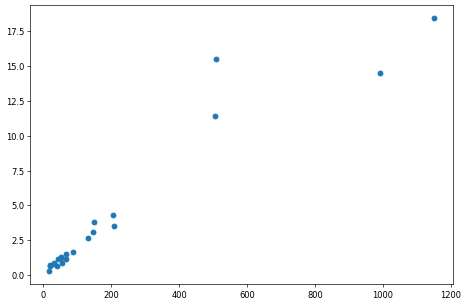

In [70]:
fig = plt.figure(figsize=(20,80), dpi=60)
ax1 = fig.add_subplot(11,2,1)
ax1.scatter(HM, FRM)

In [71]:
#Getting Total Number of Fatalities for the TSA
TSA1.loc["Total"] = TSA1.sum()
TSA2.loc["Total"] = TSA2.sum()
TSA3.loc["Total"] = TSA3.sum()
TSA4.loc["Total"] = TSA4.sum()
TSA5.loc["Total"] = TSA5.sum()
TSA6.loc["Total"] = TSA6.sum()
TSA7.loc["Total"] = TSA7.sum()
TSA8.loc["Total"] = TSA8.sum()
TSA9.loc["Total"] = TSA9.sum()
TSA10.loc["Total"] = TSA10.sum()
TSA11.loc["Total"] = TSA11.sum()
TSA12.loc["Total"] = TSA12.sum()
TSA13.loc["Total"] = TSA13.sum()
TSA14.loc["Total"] = TSA14.sum()
TSA15.loc["Total"] = TSA15.sum()
TSA16.loc["Total"] = TSA16.sum()
TSA17.loc["Total"] = TSA17.sum()
TSA18.loc["Total"] = TSA18.sum()
TSA19.loc["Total"] = TSA19.sum()
TSA20.loc["Total"] = TSA20.sum()
TSA21.loc["Total"] = TSA21.sum()
TSA22.loc["Total"] = TSA22.sum()

&lt;matplotlib.legend.Legend at 0x17593831948&gt;

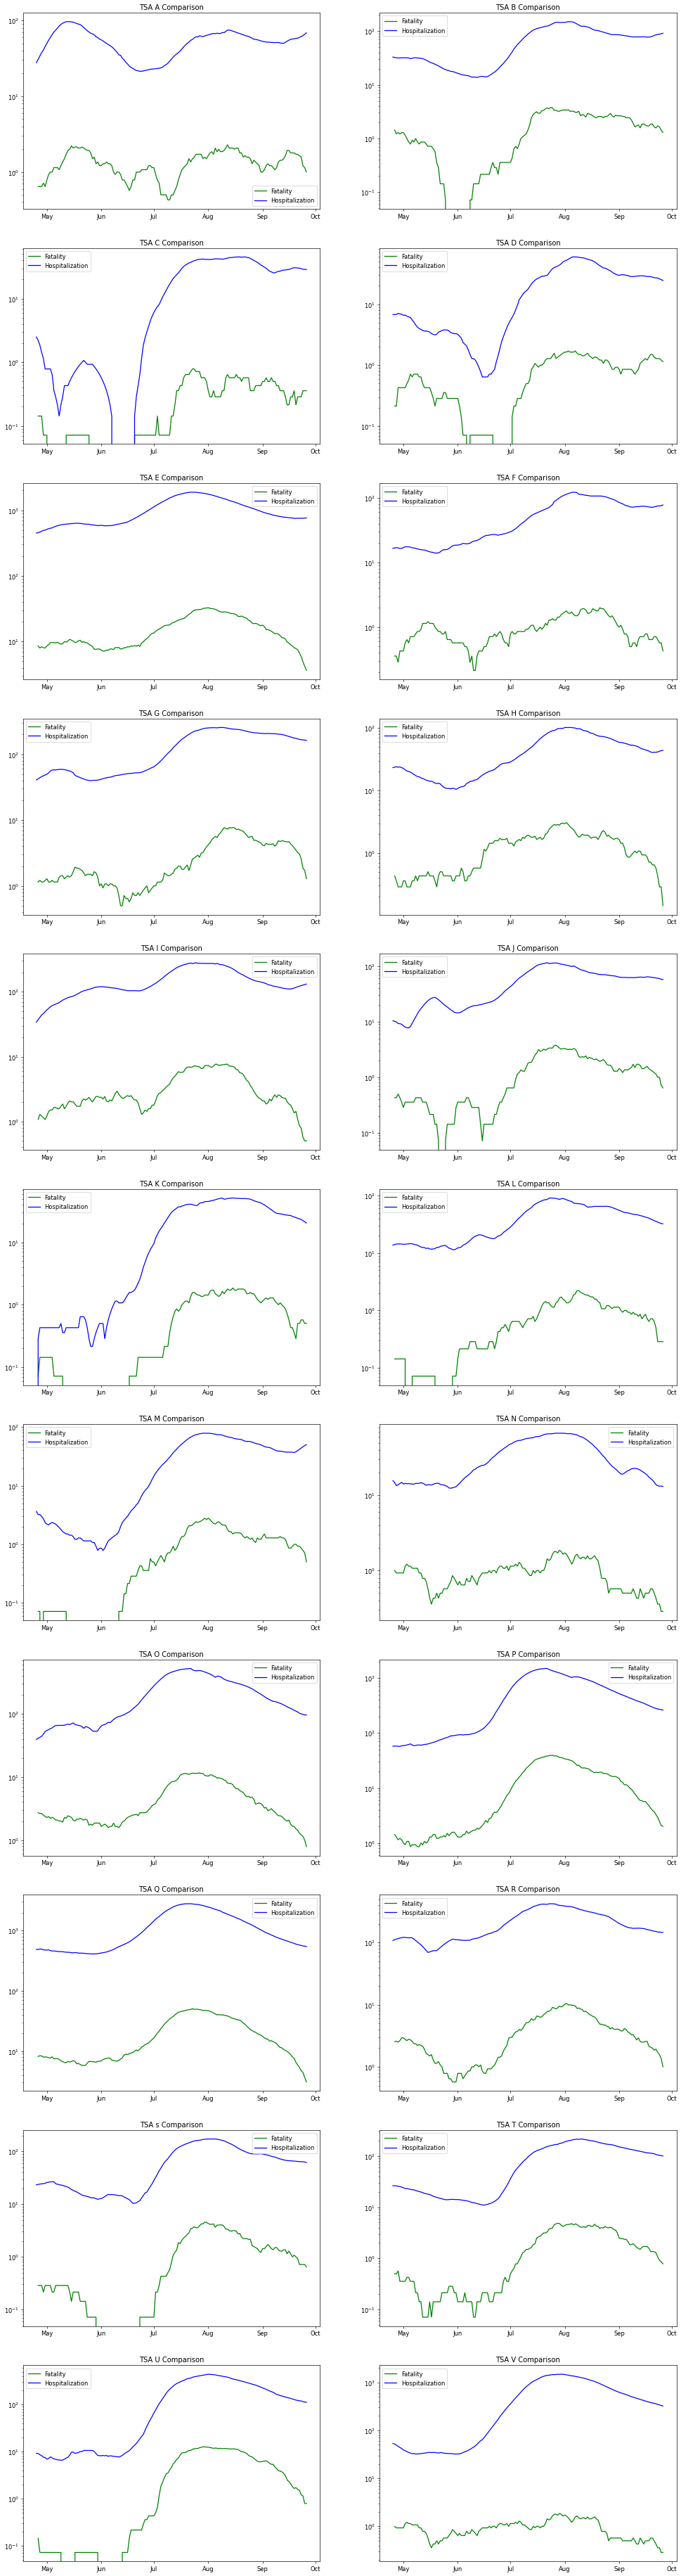

In [75]:
#Ploting for TSA 1
fig = plt.figure(figsize=(20,80), dpi=60)
ax1 = fig.add_subplot(11,2,1)
ax1.title.set_text('TSA A Comparison')
ax1.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA1.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Amarillo'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax1.legend()

ax2=plt.gca()
ax2 = fig.add_subplot(11,2,2)
ax2.title.set_text('TSA B Comparison')
ax2.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA2.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Lubbock'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax2.legend()

ax3=plt.gca()
ax3 = fig.add_subplot(11,2,3)
ax3.title.set_text('TSA C Comparison')
ax3.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA3.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Wichita Falls'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax3.legend()

ax4=plt.gca()
ax4 = fig.add_subplot(11,2,4)
ax4.title.set_text('TSA D Comparison')
ax4.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax4.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA4.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Abilene'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax4.legend()

ax5=plt.gca()
ax5 = fig.add_subplot(11,2,5)
ax5.title.set_text('TSA E Comparison')
ax5.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax5.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA5.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Dallas/Ft. Worth'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax5.legend()

ax6=plt.gca()
ax6 = fig.add_subplot(11,2,6)
ax6.title.set_text('TSA F Comparison')
ax6.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax6.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA6.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Paris'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax6.legend()

ax7=plt.gca()
ax7 = fig.add_subplot(11,2,7)
ax7.title.set_text('TSA G Comparison')
ax7.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax7.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA7.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Longview/Tyler'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax7.legend()

ax8=plt.gca()
ax8 = fig.add_subplot(11,2,8)
ax8.title.set_text('TSA H Comparison')
ax8.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax8.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA8.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Lufkin'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax8.legend()

ax9=plt.gca()
ax9 = fig.add_subplot(11,2,9)
ax9.title.set_text('TSA I Comparison')
ax9.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax9.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA9.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['El Paso'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax9.legend()

ax10=plt.gca()
ax10 = fig.add_subplot(11,2,10)
ax10.title.set_text('TSA J Comparison')
ax10.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax10.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA10.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Midland/Odessa'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax10.legend()

ax11=plt.gca()
ax11 = fig.add_subplot(11,2,11)
ax11.title.set_text('TSA K Comparison')
ax11.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax11.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA11.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['San Angelo'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax11.legend()

ax12=plt.gca()
ax12 = fig.add_subplot(11,2,12)
ax12.title.set_text('TSA L Comparison')
ax12.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax12.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA12.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Belton/Killeen'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax12.legend()

ax13=plt.gca()
ax13 = fig.add_subplot(11,2,13)
ax13.title.set_text('TSA M Comparison')
ax13.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax13.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA13.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Waco'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax13.legend()

ax14=plt.gca()
ax14 = fig.add_subplot(11,2,14)
ax14.title.set_text('TSA N Comparison')
ax14.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax14.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA14.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Bryan/College Station'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax14.legend()

ax15=plt.gca()
ax15 = fig.add_subplot(11,2,15)
ax15.title.set_text('TSA O Comparison')
ax15.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax15.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA15.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Austin'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax15.legend()

ax16=plt.gca()
ax16 = fig.add_subplot(11,2,16)
ax16.title.set_text('TSA P Comparison')
ax16.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax16.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA16.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['San Antonio'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax16.legend()

ax17=plt.gca()
ax17 = fig.add_subplot(11,2,17)
ax17.title.set_text('TSA Q Comparison')
ax17.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax17.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA17.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Houston'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax17.legend()

ax18=plt.gca()
ax18 = fig.add_subplot(11,2,18)
ax18.title.set_text('TSA R Comparison')
ax18.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax18.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA18.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Galveston'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax18.legend()

ax19=plt.gca()
ax19 = fig.add_subplot(11,2,19)
ax19.title.set_text('TSA s Comparison')
ax19.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax19.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA19.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Victoria'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax19.legend()

ax20=plt.gca()
ax20 = fig.add_subplot(11,2,20)
ax20.title.set_text('TSA T Comparison')
ax20.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax20.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA20.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Laredo'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax20.legend()

ax21=plt.gca()
ax21 = fig.add_subplot(11,2,21)
ax21.title.set_text('TSA U Comparison')
ax21.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax21.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA21.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Corpus Christi'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax21.legend()

ax22=plt.gca()
ax22 = fig.add_subplot(11,2,22)
ax22.title.set_text('TSA V Comparison')
ax22.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax22.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA14.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Lower Rio Grande Valley'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax22.legend()
